# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [3]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
train_data.set_index('time',inplace=True)
test_data.set_index('time',inplace=True)

test null values, none seen

In [6]:
train_data.isnull().sum()

A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
Y1    0
Y2    0
dtype: int64

In [7]:
test_data.isnull().sum()

id    0
A     0
B     0
C     0
D     0
E     0
F     0
G     0
H     0
I     0
J     0
K     0
L     0
M     0
N     0
dtype: int64

split into Y1 and Y2 to further analyze factors into each variable

In [8]:
train_data_Y1 = train_data.drop("Y2",axis=1)
train_data_Y2 = train_data.drop("Y1",axis=1)

In [10]:
train_data_Y2

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y2
time,,,,,,,,,,,,,,,
0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.310081
1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.305374
2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.631485
3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,-0.535212
4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.154864
80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,-0.474736
80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.503083


## 2) Investigate the Dataset

### investigate correlations

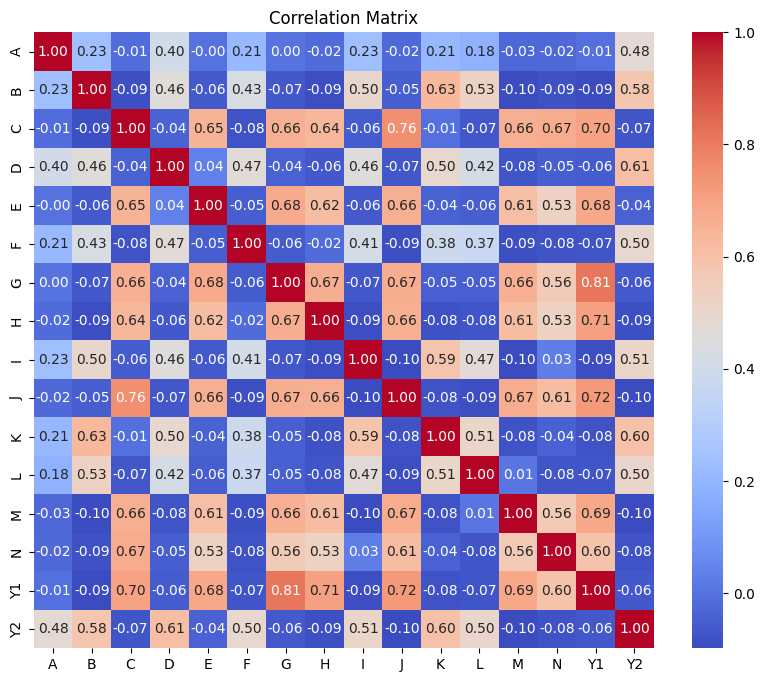

In [15]:
corr = train_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

interesting findings:
- everything Y1 is correlated to isn't to Y2, seem like opposites, which seems uncorrelated yet correlated in a way
- highest correlation between predictors themselves: J and C at 0.76
- Y1: high correlations with C, E, G, H, J, M, N
- Y2: high correlations with A, B, D, F, I, K, L

### investigate each variable itself to see if we need to normalize later

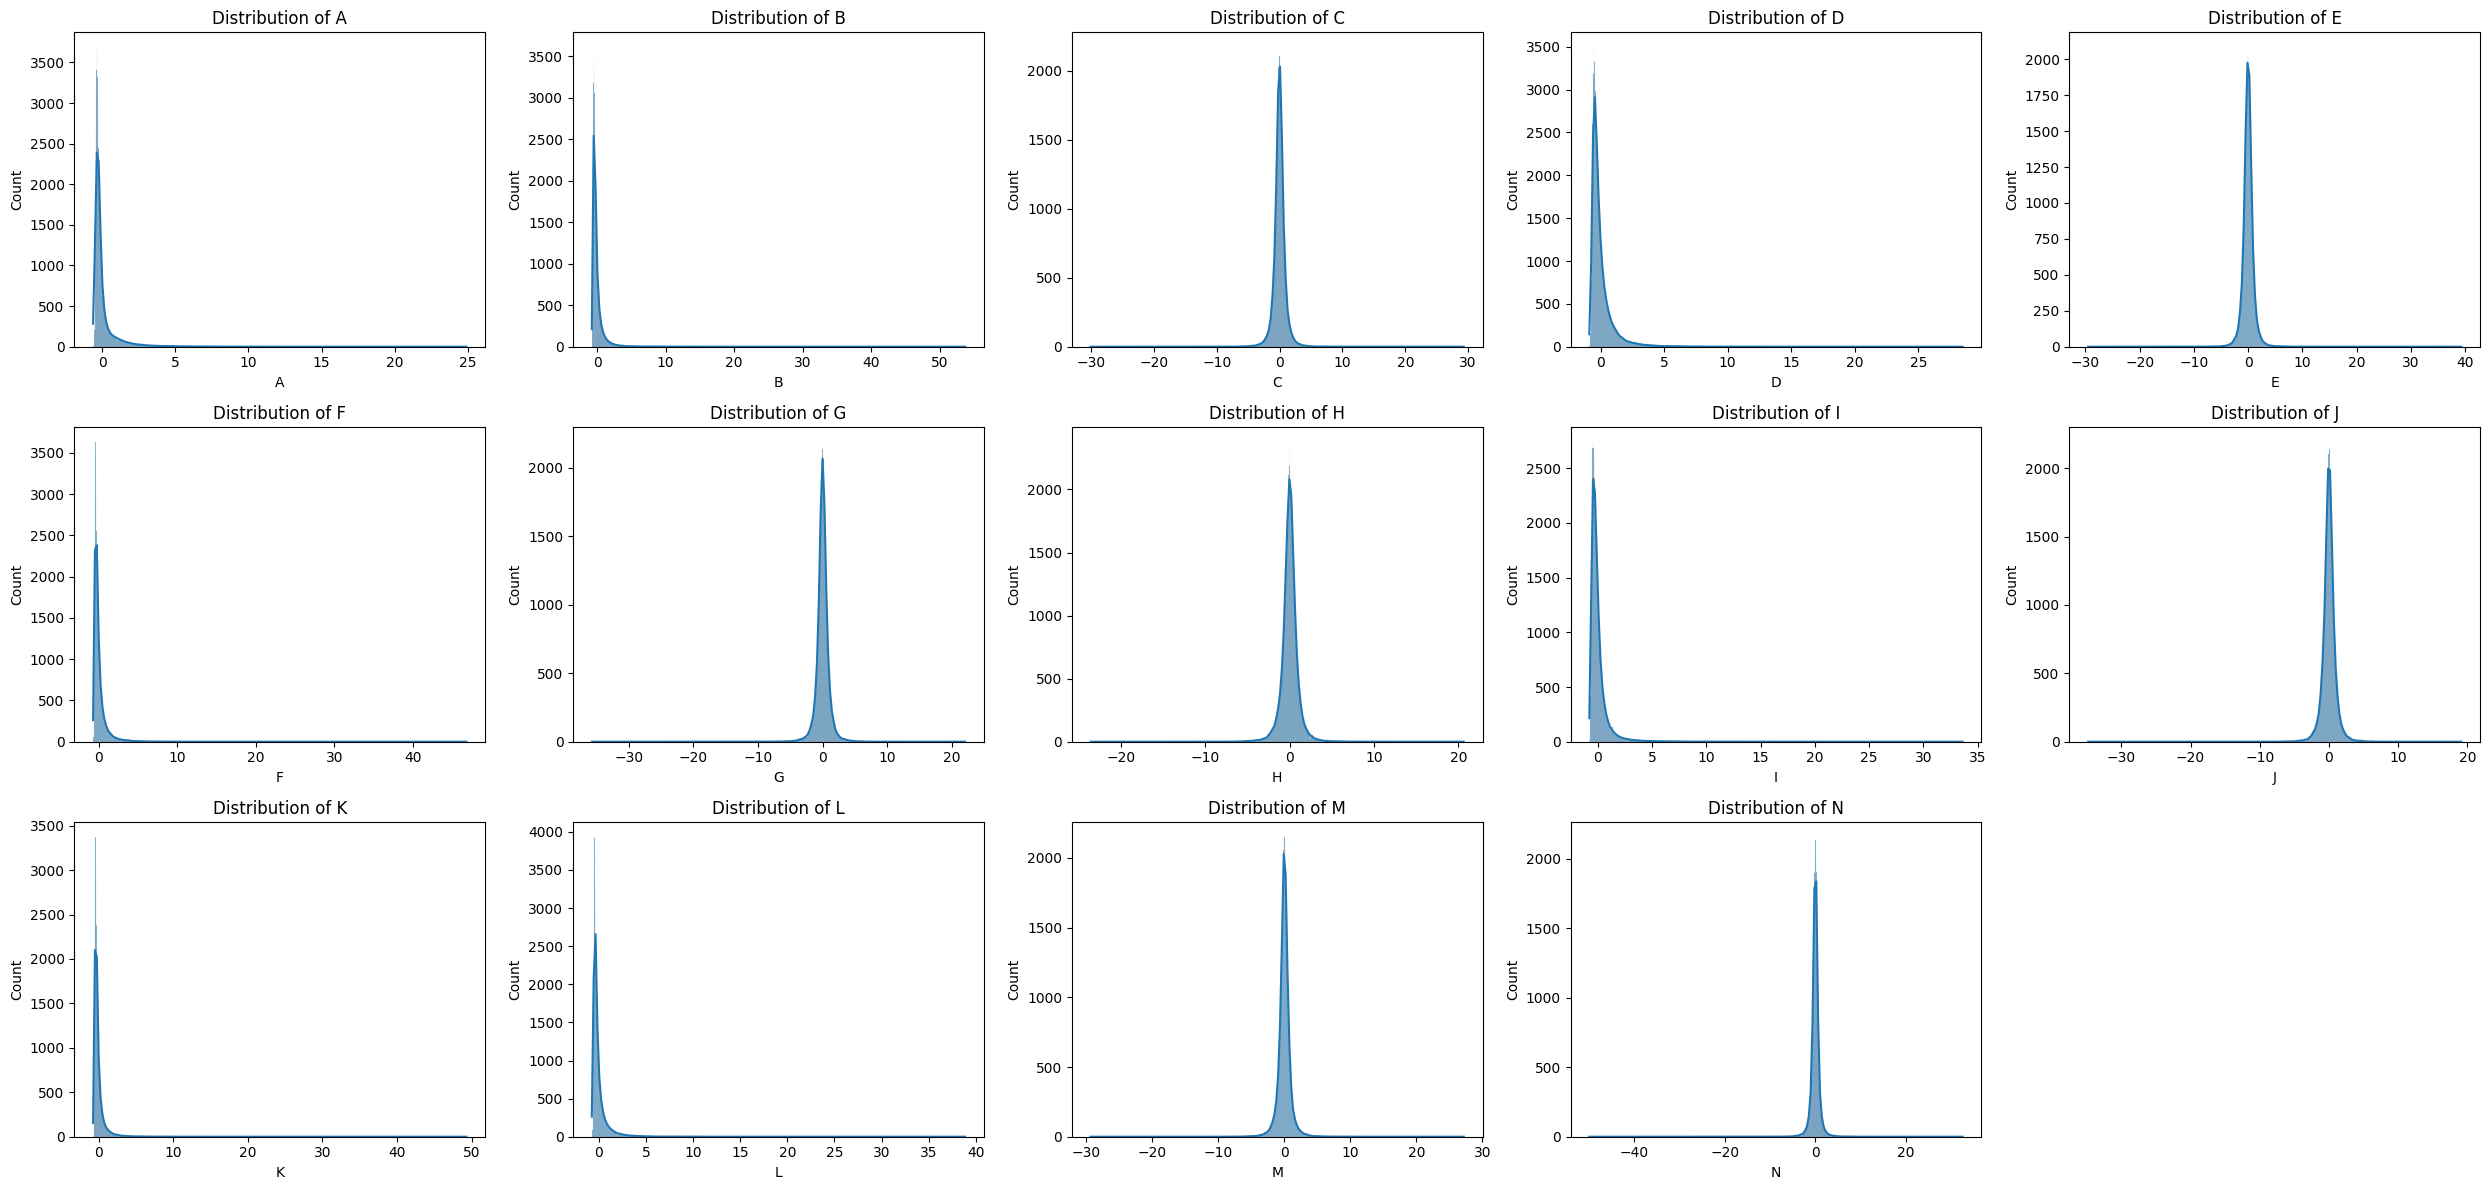

In [21]:
features = train_data.columns.difference(['Y1', 'Y2'])
response = ['Y1', 'Y2']

# Decide grid size
n_cols = 5  # number of columns in the subplot grid
n_rows = math.ceil(len(features) / n_cols)  # calculate rows needed

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each numeric column
for i, col in enumerate(features):
    sns.histplot(train_data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

B, D, F, I, K, L all don't look very normal, might want to normalize in the future

### look for outliers

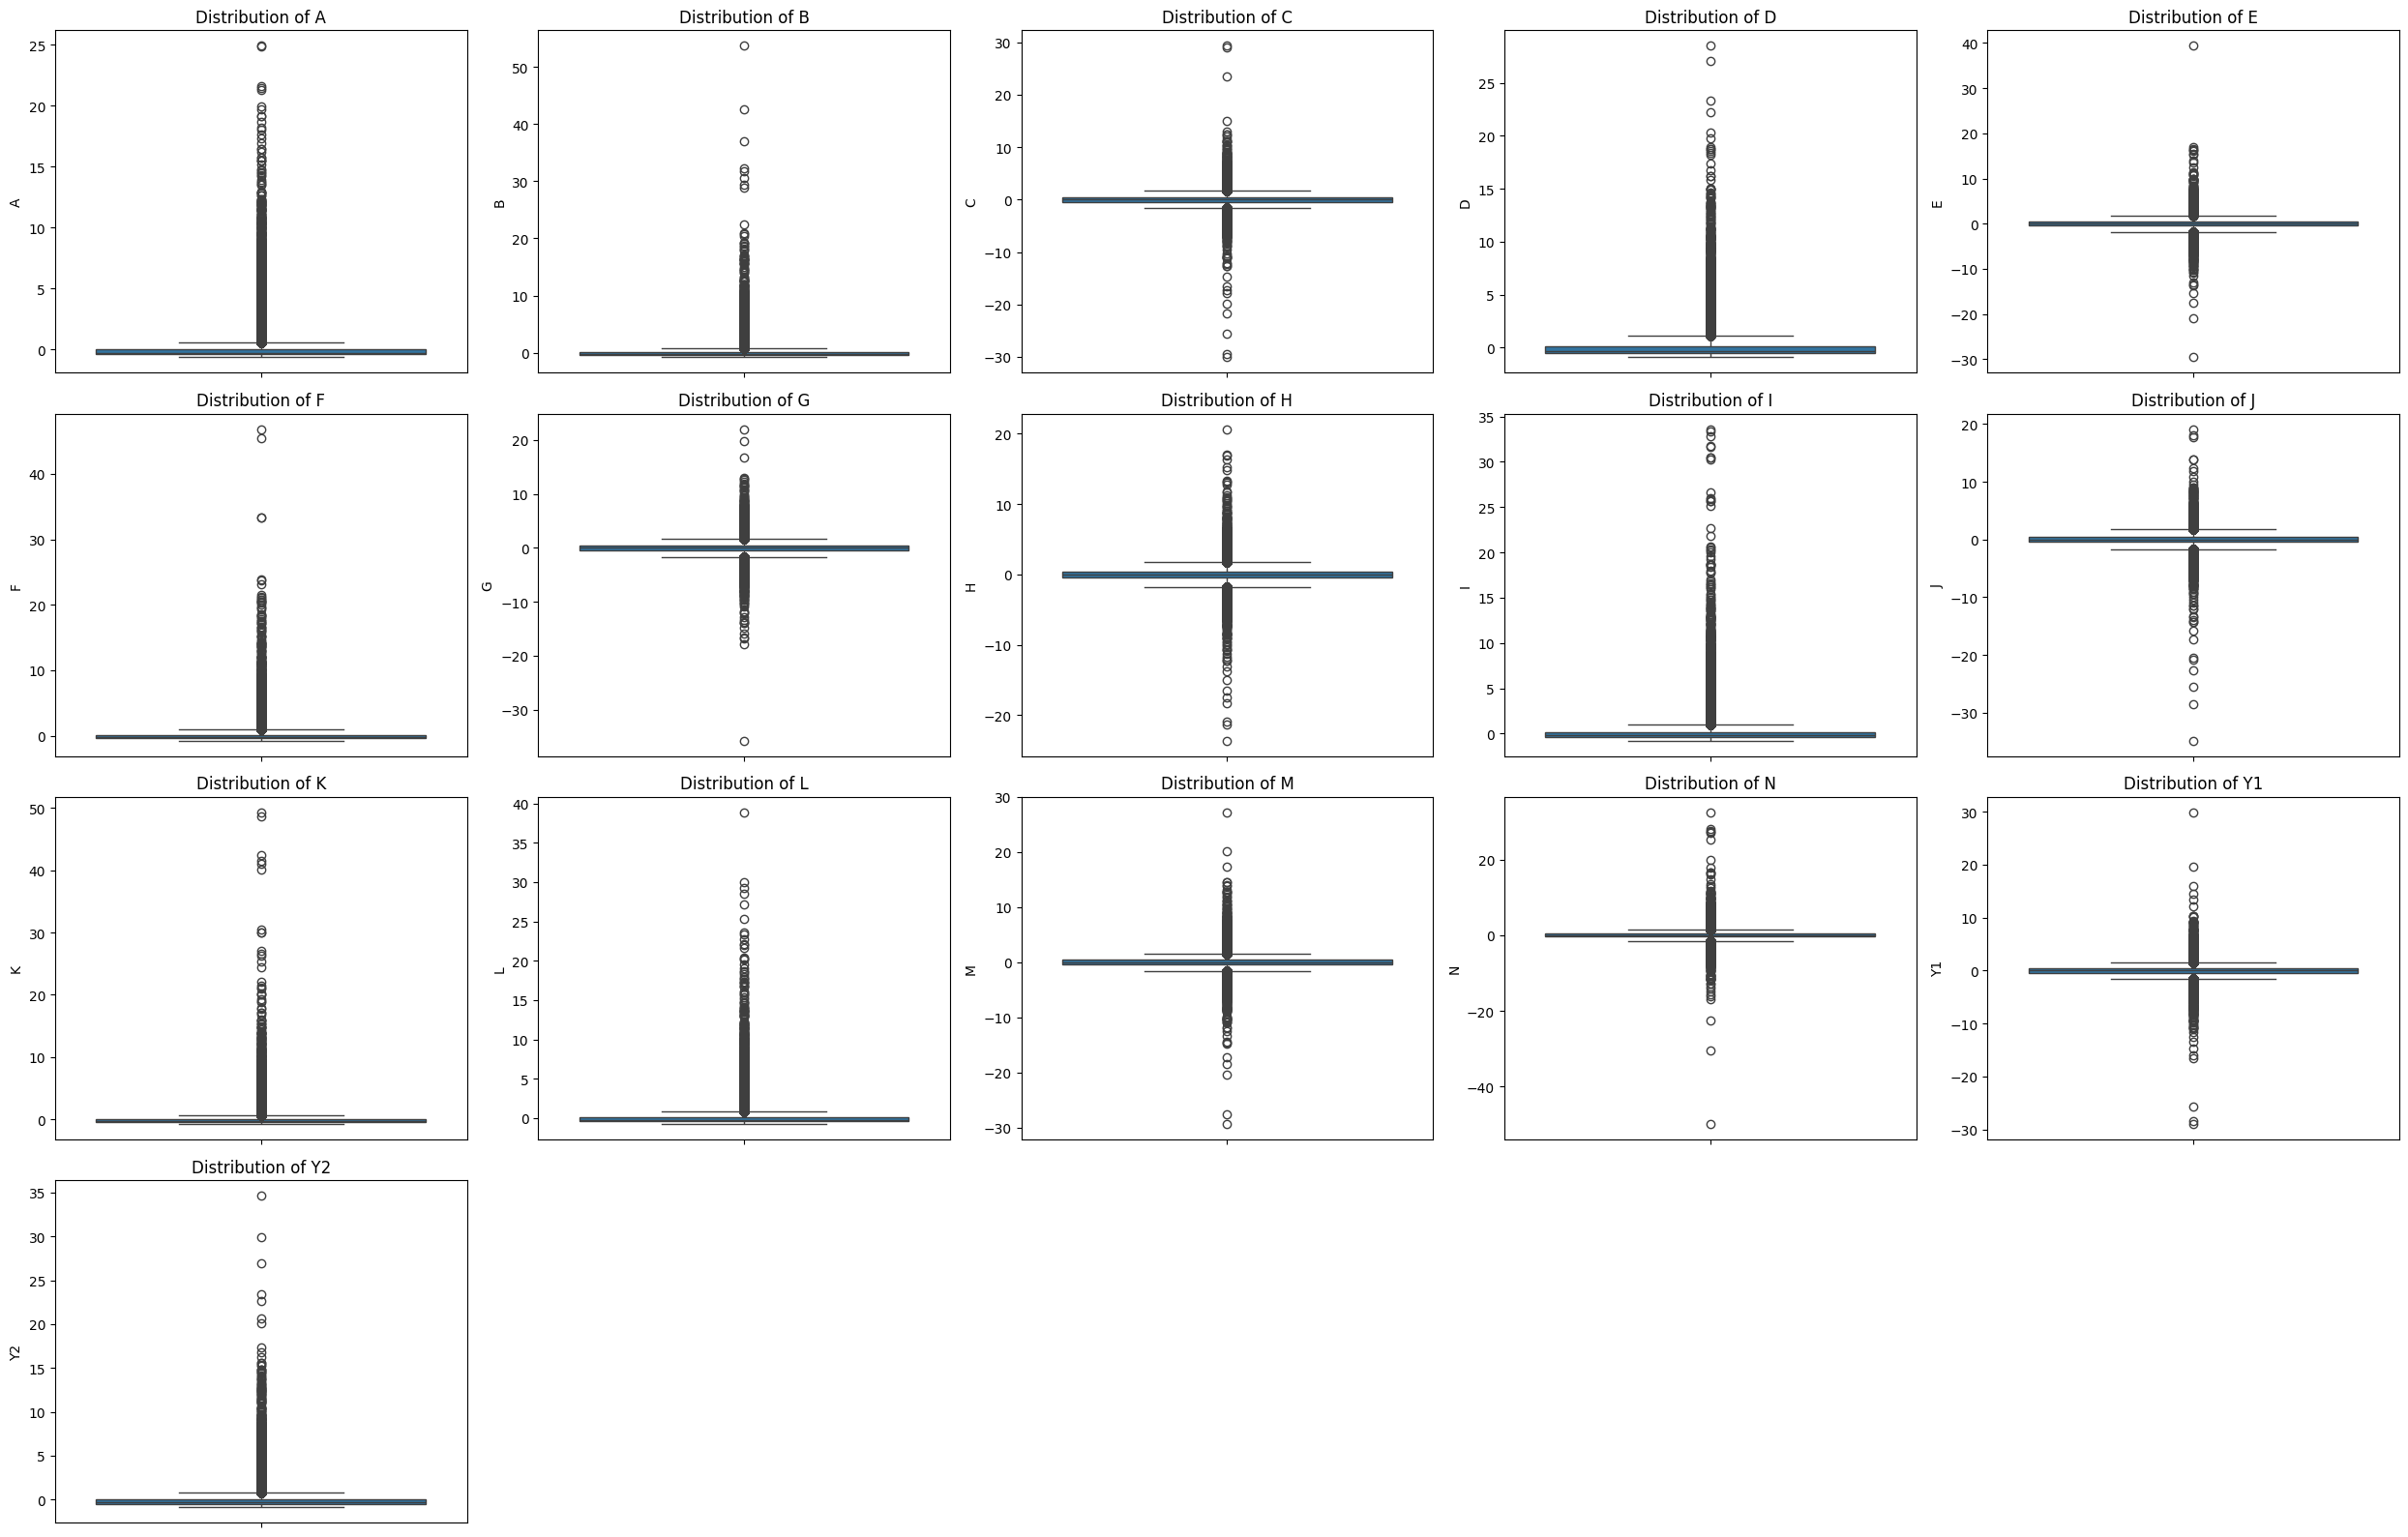

In [23]:
# Decide grid size
all_cols = train_data.columns
n_cols = 5  # number of columns in the subplot grid
n_rows = math.ceil(len(all_cols) / n_cols)  # calculate rows needed

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot each numeric column
for i, col in enumerate(all_cols):
    sns.boxplot(train_data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- seems like we have outliers, i'd say for a one-size-fits-all, above 30 and below -30 looks consistently like an outlier, could try up to 25 and -25

Text(0.5, 1.0, 'Distribution of Y2')

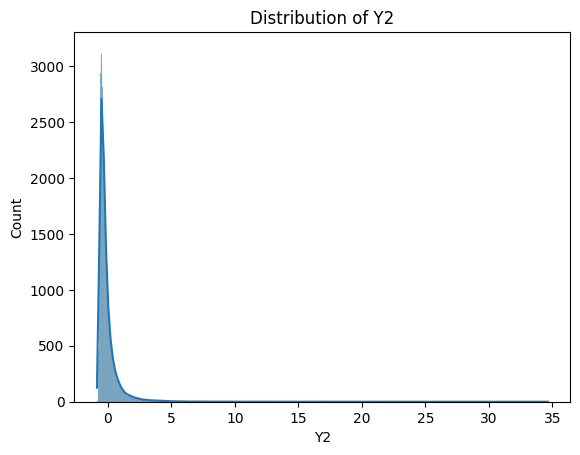

In [152]:
sns.histplot(train_data['Y2'], kde=True)
plt.title('Distribution of Y2')

Y1 is normalized by Y2 is right-skewed

## 3) Preprocessing and Modeling

- scaling variables
	- doesn't seem to make a difference
- removing outliers?
	- nah seems to do better with all information
- only predict with correlated variables?
- test different models, parameters
- recurisve feature elimination
- experiment with different test sizes
	- about the same but can still test

observations:
- about same test results for scaled vs. non scaled (only tried standard scaling)

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
train_data_nooutlier = train_data.copy()
for feature in features:
	Q1 = train_data_nooutlier[feature].quantile(0.1)
	Q3 = train_data_nooutlier[feature].quantile(0.9)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	train_data_nooutlier = train_data_nooutlier[(train_data_nooutlier[feature] >= lower_bound) & (train_data_nooutlier[feature] <= upper_bound)]

train_data_nooutlier

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Y1,Y2
time,,,,,,,,,,,,,,,,
0,0.207366,-0.159951,-0.634176,-0.580962,-0.266505,0.060173,-0.475257,-1.486516,-0.332594,-0.671466,-0.226149,-0.187624,-0.780237,-0.785965,-0.935902,-0.310081
1,0.188828,-0.265508,0.042143,-0.550442,-0.132319,-0.185219,0.028295,0.093210,-0.518139,-0.251917,-0.347845,-0.359069,-0.161254,0.020401,-0.089707,-0.305374
2,-0.144261,-0.577142,-0.214634,-0.747391,-0.184255,-0.464831,-0.085181,0.700449,-0.603438,0.197773,-0.566696,-0.580799,0.202726,0.135261,-0.077855,-0.631485
3,0.208982,-0.310449,0.513708,-0.562868,0.742308,-0.305487,0.762246,1.363020,-0.384575,0.525556,-0.348514,-0.428099,0.548993,0.471031,0.941271,-0.535212
4,0.093320,-0.358156,0.173188,-0.687296,-0.161461,-0.116062,-0.245748,0.863372,-0.655588,-0.263358,-0.557428,-0.481214,0.083602,0.003087,-0.039582,-0.490561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80000,-0.339802,-0.372094,-0.120952,-0.363438,0.266299,-0.222866,-0.000358,0.470755,-0.412086,-0.332426,-0.374358,-0.251086,-0.058820,0.312828,-0.564065,-0.154864
80001,-0.421921,-0.222554,-0.689585,-0.512266,-0.206562,-0.494450,-0.197705,-0.566908,-0.570731,-1.093729,-0.382964,-0.249580,-0.446410,-0.527049,0.031323,-0.474736
80002,-0.467038,-0.282018,0.010707,-0.589594,0.067635,-0.410820,0.032695,-0.506164,-0.513340,-0.871582,-0.345584,-0.402364,-0.372984,-0.419894,-0.213572,-0.503083


In [128]:
def preprocess_and_run_model(df, scaling, model, which_response_predict = ['Y1','Y2']):
	df = df.copy()
	preprocessor = ColumnTransformer(
	transformers=[('num',scaling,features)],
	remainder='passthrough'
	)

	pipeline = Pipeline(steps=[('preprocessor',preprocessor),
							('model',model)])
	
	X = df.drop(columns=['Y1','Y2'],axis=1)
	y = df[which_response_predict]

	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
	pipeline.fit(X_train,y_train)

	# Evaluate
	print("Model used:", model)
	print("Scaling used:", scaling)
	print("Response(s) Predicting:", which_response_predict)
	print("Train accuracy:", pipeline.score(X_train, y_train))
	print("Test accuracy:", pipeline.score(X_test, y_test))

	return pipeline

In [127]:
pipeline = preprocess_and_run_model(train_data, StandardScaler(), RandomForestRegressor(),['Y1','Y2'])

Model used: RandomForestRegressor()
Scaling used: StandardScaler()
Response(s) Predicting: ['Y1', 'Y2']
Train accuracy: 0.960124266445036
Test accuracy: 0.7355201517895388


feature importance

In [103]:
def plot_feature_importance(pipeline, features):
	model = pipeline.named_steps['model']
	importances = model.feature_importances_
	feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
	feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
	feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
	plt.title('Feature Importances')
	plt.show()

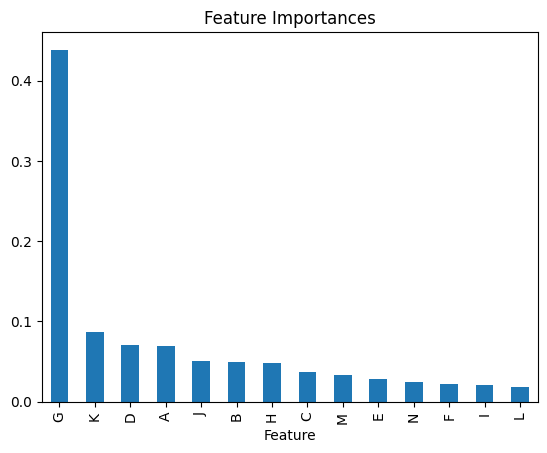

In [94]:
plot_feature_importance(pipeline, features)

# Predict Y1 and Y2 separately

In [109]:
pipeline_Y1 = preprocess_and_run_model(train_data, StandardScaler(), RandomForestRegressor(),['Y1'])
pipeline_Y2 = preprocess_and_run_model(train_data, StandardScaler(), RandomForestRegressor(),['Y2'])

/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model used: RandomForestRegressor()
Scaling used: StandardScaler()
Response(s) Predicting: ['Y1']
Train accuracy: 0.9644630743180519
Test accuracy: 0.7694523870470809


/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model used: RandomForestRegressor()
Scaling used: StandardScaler()
Response(s) Predicting: ['Y2']
Train accuracy: 0.959102398177961
Test accuracy: 0.7351060035603967


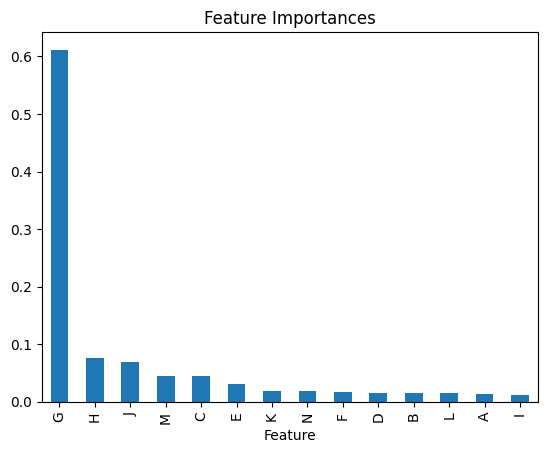

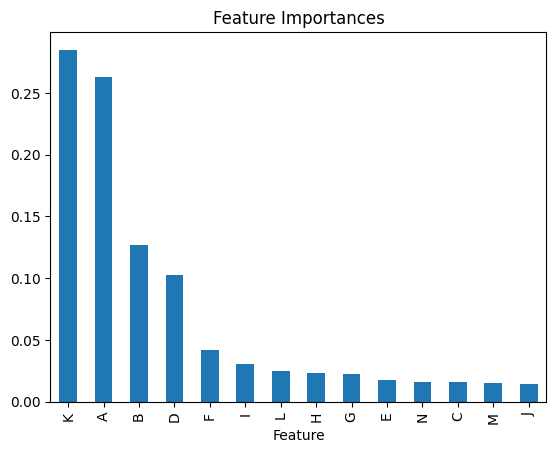

In [110]:
plot_feature_importance(pipeline_Y1, features)
plot_feature_importance(pipeline_Y2, features)

# Using Different Models to Get a Baseline

In [124]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

start with Y1, then do same with Y2

In [134]:
X = train_data.drop(columns=['Y1','Y2'],axis=1)
y_y1 = train_data['Y1']
y_y2 = train_data['Y2']
y = train_data[['Y1','Y2']]
features = train_data.columns.difference(['Y1', 'Y2'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train_y1, y_test_y1 = train_test_split(X, y_y1, test_size=0.15, random_state=42)
X_train, X_test, y_train_y2, y_test_y2 = train_test_split(X, y_y2, test_size=0.15, random_state=42)

In [137]:
preprocessor = ColumnTransformer(
	transformers=[('num', StandardScaler(), features)],
	remainder='passthrough'
)

models = {
	# "Random Forest": RandomForestRegressor(),
	"Gradient Boosting": GradientBoostingRegressor(),
	"XGBoost": XGBRegressor(),
	"LGBM": LGBMRegressor(),
	# "Linear Regression": LinearRegression(),
	# "Ridge Regression": Ridge(),
	# "Lasso Regression": Lasso(),
	# "Decision Tree": DecisionTreeRegressor(),
	# "Support Vector Regressor": SVR(),
	# "AdaBoost": AdaBoostRegressor(),
}

both vars first

In [138]:
# Models that need MultiOutputRegressor
needs_multioutput = ["Gradient Boosting", "XGBoost","LGBM"]

# Store results
results = []

for name, model in models.items():
    # Wrap if multi-output not supported
    if name in needs_multioutput:
        model = MultiOutputRegressor(model)
    
    # Build pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit and evaluate
    pipeline.fit(X_train, y_train)
    r2_train = pipeline.score(X_train, y_train)
    r2_test = pipeline.score(X_test, y_test)
    
    results.append({
        'Model': name,
        'R2_Train': r2_train,
        'R2_Test': r2_test
    })
    print(f"Model: {name}, R2 Train: {r2_train:.4f}, R2 Test: {r2_test:.4f}")

# Convert to DataFrame and sort by test score
results_df = pd.DataFrame(results).sort_values(by='R2_Test', ascending=False)
print(results_df)

Model: Gradient Boosting, R2 Train: 0.7701, R2 Test: 0.7561
Model: XGBoost, R2 Train: 0.8736, R2 Test: 0.7296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 68000, number of used features: 14
[LightGBM] [Info] Start training from score -0.001899
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 68000, number of used features: 14
[LightGBM] [Info] Start training from score -0.059571
Model: LGBM, R2 Train: 0.8043, R2 Test: 0.7466
               Model  R2_Train   R2_Test
0  Gradient Boosting  0.770080  0.756111
2          

/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


cv to check if predicting one var at a time or two together is better, use gradientboosting as baseline

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

RANDOM = 42
kf = KFold(n_splits=7, shuffle=True, random_state=RANDOM)
multi = MultiOutputRegressor(LGBMRegressor(random_state=RANDOM))
scores = cross_val_score(multi,X_train,y_train,cv = kf, scoring = 'r2', n_jobs=-1)
print("Cross-validated R2 scores mean:", scores.mean())

In [ ]:
single = LGBMRegressor(random_state=RANDOM)
scores_y1 = cross_val_score(single,X_train,y_train_y1,cv = kf, scoring = 'r2', n_jobs=-1)
scores_y2 = cross_val_score(single,X_train,y_train_y2,cv = kf, scoring = 'r2', n_jobs=-1)
print("Cross-validated R2 scores mean Y1:", scores_y1.mean())
print("Cross-validated R2 scores mean Y2:", scores_y2.mean())

analyzing learning curve

In [148]:
from sklearn.model_selection import learning_curve
import numpy as np

model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))

train_sizes, train_scores, val_scores = learning_curve(
    model,
    X_train, y_train,
    cv=5,                 # 5-fold cross-validation
    scoring='r2',         # Use R² score
    train_sizes=np.linspace(0.1, 1.0, 10),  # From 10% to 100% of training data
    n_jobs=-1             # Use all cores
)

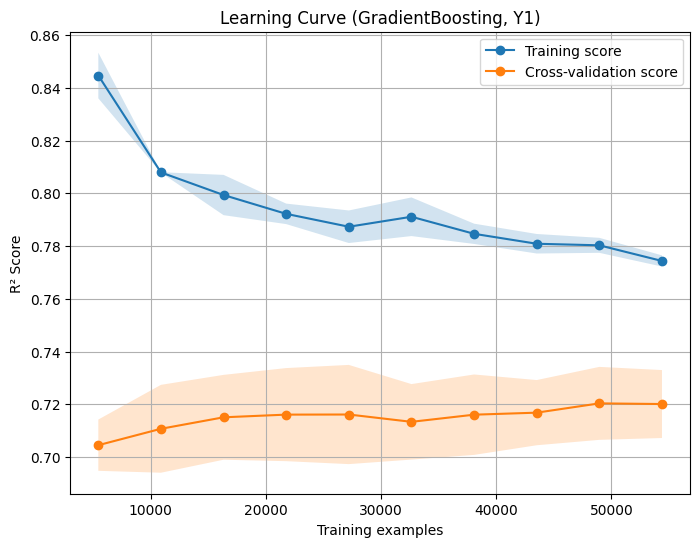

In [149]:
# Compute mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_mean, 'o-', label="Cross-validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.title("Learning Curve (GradientBoosting, Y1)")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

from the graph:
- no high bias: validation scores aren't super low
- mild variance (overfitting), seen from gap between training score and cross-validation score
- more data won't help much: both curves have flattened, adding more training data probably won't help

steps:
- can reduce variance by
	- Regularize the model (e.g., reduce max_depth, increase min_samples_leaf, add subsample < 1.0).
	- use XGB or LGBM

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_num = X_train.select_dtypes(include=np.number).copy()
vif = pd.DataFrame({'feature':X_num.columns,
                    'VIF':[variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]})
print(vif.sort_values('VIF', ascending=False).head(20))


   feature       VIF
2        C  3.297457
9        J  3.164288
6        G  2.646916
12       M  2.437965
4        E  2.399170
7        H  2.336276
10       K  2.172445
13       N  2.060611
1        B  1.998184
3        D  1.813623
8        I  1.805015
11       L  1.632370
5        F  1.456237
0        A  1.205367


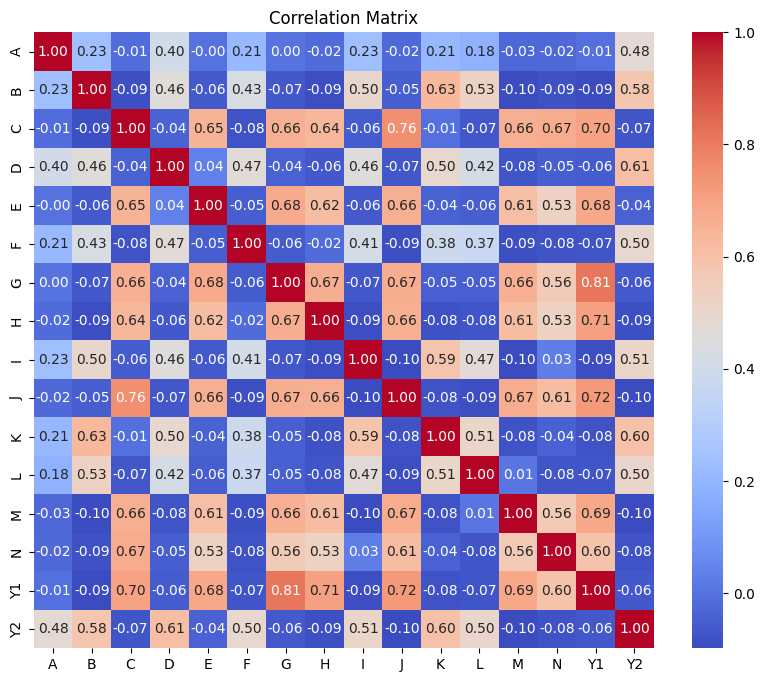

In [157]:
corr = train_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Y1 first

In [179]:
from sklearn.model_selection import RandomizedSearchCV
train_data_y1 = train_data.drop(columns=['A','Y2'])
X_train, X_test, y_train, y_test = train_test_split(train_data_y1.drop(columns=['Y1']), train_data_y1['Y1'], test_size=0.15, random_state=42)

In [ ]:
rf = RandomForestRegressor(random_state=RANDOM, n_jobs=-1)
param_dist = {
  'n_estimators': [200, 500, 800],
  'max_depth': [None, 10, 20, 40],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
  'max_features': ['sqrt','log2', 0.3, 0.5]
}
rs_rf = RandomizedSearchCV(rf, param_dist, n_iter=40, cv=3, scoring='r2', random_state=RANDOM, n_jobs=-1)
rs_rf.fit(X_train, y_train)

/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 40],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 500, 800]},
                   random_state=42, scoring='r2')

In [ ]:
rs_rf.best_estimator_

RandomForestRegressor(max_features=0.3, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=800, n_jobs=-1, random_state=42)

In [ ]:
rs_rf.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 0.3,
 'max_depth': None}

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Preprocessing: scale numeric features
numeric_features = X_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"
)

# 2. Build pipeline: preprocessing + Gradient Boosting model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(random_state=RANDOM))
])

# 3. Define parameter grid for Gradient Boosting
param_dist = {
    'model__n_estimators': [100, 300, 500],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__subsample': [0.8, 1.0]
}

# 4. RandomizedSearch with pipeline
rs_gb = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring="r2",
    random_state=RANDOM,
    n_jobs=-1
)

# 5. Fit
rs_gb.fit(X_train, y_train)

# 6. Results
print("Best Parameters:", rs_gb.best_params_)
print("Best CV R²:", rs_gb.best_score_)

Best Parameters: {'model__subsample': 1.0, 'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_depth': 7, 'model__learning_rate': 0.01}
Best CV R²: 0.744786113891451


In [183]:
# 1. Preprocessing: scale numeric features
numeric_features = X_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"
)

# 2. Build pipeline: preprocessing + XGB model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(random_state=RANDOM))
])

# 3. Define parameter grid for Gradient Boosting, if using pipeline you need "model"
param_dist = {
 'model__n_estimators': [100, 300, 600],
 'model__learning_rate': [0.01, 0.05, 0.1],
 'model__max_depth': [3, 6, 10],
 'model__subsample': [0.6, 0.8, 1.0],
 'model__colsample_bytree': [0.6, 0.8, 1.0],
 'model__reg_alpha': [0, 0.01, 0.1],
 'model__reg_lambda': [1, 2, 5]
}


# 4. RandomizedSearch with pipeline
rs_xgb = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring="r2",
    random_state=RANDOM,
    n_jobs=-1
)

# 5. Fit
rs_xgb.fit(X_train, y_train)

# 6. Results
print("Best Parameters:", rs_xgb.best_params_)
print("Best CV R²:", rs_xgb.best_score_)

Best Parameters: {'model__subsample': 0.8, 'model__reg_lambda': 5, 'model__reg_alpha': 0, 'model__n_estimators': 100, 'model__max_depth': 6, 'model__learning_rate': 0.05, 'model__colsample_bytree': 1.0}
Best CV R²: 0.7440982521185792


In [ ]:
# 1. Preprocessing: scale numeric features
numeric_features = X_train.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"
)

# 2. Build pipeline: preprocessing + XGB model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LGBMRegressor(random_state=RANDOM))
])

# 3. Define parameter grid for Gradient Boosting, if using pipeline you need "model"
param_dist = {
    "model__n_estimators": [200, 500, 1000],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [-1, 5, 10, 20],
    "model__num_leaves": [31, 63, 127, 255],
    "model__min_child_samples": [5, 10, 20, 50],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__reg_alpha": [0, 0.01, 0.1, 1],
    "model__reg_lambda": [0, 0.01, 0.1, 1]
}


# 4. RandomizedSearch with pipeline
rs_lgbm = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    scoring="r2",
    random_state=RANDOM,
    n_jobs=-1
)

# 5. Fit
rs_lgbm.fit(X_train, y_train)

# 6. Results
print("Best Parameters:", rs_lgbm.best_params_)
print("Best CV R²:", rs_lgbm.best_score_)

In [189]:
rs_lgbm.best_params_

{'model__subsample': 1.0,
 'model__reg_lambda': 0.1,
 'model__reg_alpha': 1,
 'model__num_leaves': 63,
 'model__n_estimators': 500,
 'model__min_child_samples': 10,
 'model__max_depth': -1,
 'model__learning_rate': 0.01,
 'model__colsample_bytree': 0.6}

In [ ]:
xgb_best = rs_xgb.best_estimator_
lgbm_best = rs_lgbm.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['B', 'C', 'D', 'E', 'F', 'G',
                                                   'H', 'I', 'J', 'K', 'L', 'M',
                                                   'N'])])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.6, learning_rate=0.01,
                               min_child_samples=10, n_estimators=500,
                               num_leaves=63, random_state=42, reg_alpha=1,
                               reg_lambda=0.1))])

## Ensembling

In [191]:
from sklearn.metrics import r2_score

In [193]:
xgb_preds = xgb_best.predict(X_test)
lgbm_preds = lgbm_best.predict(X_test)
ensemble_preds = (xgb_preds + lgbm_preds) / 2

r2 = r2_score(y_test, ensemble_preds)
r2

/Users/kevingui/anaconda3/envs/school/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


0.783525499847592

stacking teaches the model how much weight to give to each respective model

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

stack = StackingRegressor(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('gbm', gbm)
    ],
    final_estimator=Ridge(alpha=1.0)  # meta-learner
)

stack.fit(X_train, y_train)
stack_preds = stack.predict(X_test)

- handle Y2 skew
	- train separate models, transform Y2 and not Y1
- remove non-correlated features
- create interaction variables
- tune hyperparameters
- ensemble multiple models together
	- simple averaging
	- stacking
	- bagging (already built into rf and decision trees, hand-tuning weights)

## 4) Submit Predictions

In [ ]:
preprocessor = ColumnTransformer(
	transformers=[('num', StandardScaler(), features)],
	remainder='passthrough'
)

models = {
	# "Random Forest": RandomForestRegressor(),
	"Gradient Boosting": GradientBoostingRegressor(),
	"XGBoost": XGBRegressor(),
	"LGBM": LGBMRegressor(),
	# "Linear Regression": LinearRegression(),
	# "Ridge Regression": Ridge(),
	# "Lasso Regression": Lasso(),
	# "Decision Tree": DecisionTreeRegressor(),
	# "Support Vector Regressor": SVR(),
	# "AdaBoost": AdaBoostRegressor(),
}

In [47]:
X = test_data[features].reset_index(drop=True)
preds = pipeline.predict(X)
preds_df = pd.DataFrame(preds, columns=['Y1','Y2'])
preds_df = pd.concat([test_data[['id']].reset_index(drop=True), preds_df], axis=1)
preds_df

,id,Y1,Y2
0,1,0.462567,-0.401639
1,2,-0.185771,-0.536255
2,3,-0.216074,-0.396963
3,4,-0.482923,-0.118523
4,5,-0.789021,-0.049919
...,...,...,...
15991,15992,-0.122712,-0.436370
15992,15993,-0.096079,-0.444705
15993,15994,0.315165,-0.354108
15994,15995,0.363142,-0.294161


In [48]:
# save preds to csv
preds_df.to_csv('preds.csv', index=False)